# MAE6226 Homework 6

Li Lin

In [315]:
import math
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

## Problem 1

$W(Z) = -\frac{\kappa}{2\pi}\frac{1}{z} = -\frac{\kappa}{2\pi}\frac{1}{re^{i\theta}} = -\frac{\kappa}{2\pi}e^{-i\theta} = -\frac{\kappa}{2\pi}(\cos\theta-i\sin\theta) = -\frac{\kappa}{2\pi}\cos\theta+i\frac{\kappa}{2\pi}\sin\theta$.

Therefore, $\Phi(Z) = -\frac{\kappa}{2\pi}\cos\theta$, $\Psi(Z) = \frac{\kappa}{2\pi}\sin\theta$.

## Problem 2

### Question a

$W = z^n = r^ne^{i\theta{n}} = r^n\cos{n\theta}+ir^n\sin{n\theta}$, yields

$\Psi = r^n\sin{n\theta}$.

Based on the periodic property of $\sin{n\theta}$, the flow field is devided by $2n$.

### Question b

In [316]:
N = 50.0
x0,xn = -4.0,4.0
y0,yn = -4.0,4.0
x = np.linspace(x0,xn,N)
y = np.linspace(y0,yn,N)
X,Y = np.meshgrid(x,y)

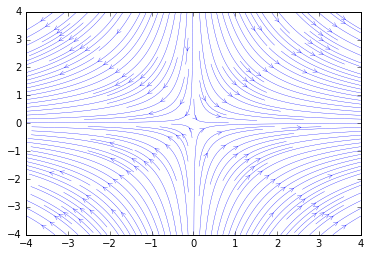

In [317]:
z = X+1j*Y
n = 2
w = n*z**(n-1)
plt.xlim(x0, xn)
plt.ylim(y0, yn)
plt.streamplot(X, Y, w.real, -w.imag, density = 2, linewidth = 0.3, arrowsize = 1, arrowstyle = '->');

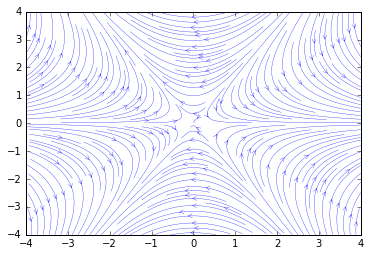

In [318]:
n = 3
w = n*z**(n-1)
plt.xlim(x0, xn)
plt.ylim(y0, yn)
plt.streamplot(X, Y, w.real, -w.imag, density = 2, linewidth = 0.3, arrowsize = 1, arrowstyle = '->');

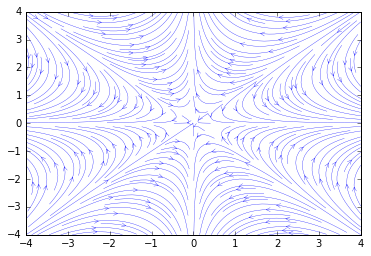

In [319]:
n = 4
w = n*z**(n-1)
plt.xlim(x0, xn)
plt.ylim(y0, yn)
plt.streamplot(X, Y, w.real, -w.imag, density = 2, linewidth = 0.3, arrowsize = 1, arrowstyle = '->');

## Problem 3

### Question a

$W(z) = \Phi(z)+i\Psi{z} = \frac{\Gamma}{2\pi}-i\frac{\Gamma}{2\pi}\ln{r} = \frac{\Gamma}{2\pi}(\theta-i\ln{r})$.

Note that

$z = re^{i\theta} => r = \frac{z}{e^{i\theta}} => \ln{r} = \ln\frac{z}{e^{i\theta}} = \ln{z}-i\theta$,

yield

$\theta-i\ln{r} = \theta-i(\ln{z}-i\theta) = -i\ln{z}$.

Thus $W(z) = -\frac{\Gamma}{2\pi}i\ln{z} = -\frac{1}{\pi}i\ln(z-1)$.

### Question b

$w = -\frac{1}{\pi}i\frac{1}{z-1}+\frac{1}{\pi}i\frac{1}{z+1} = \frac{2i}{\pi(y^2+1)}$,

thus

$v = \frac{2}{\pi(y^2+1)}$.

Then

$\frac{P(y)-P_\infty}{\rho} = \frac{-v^2}{2} = -\frac{2}{\pi^2(y^2+1)^2}$.

### Question c

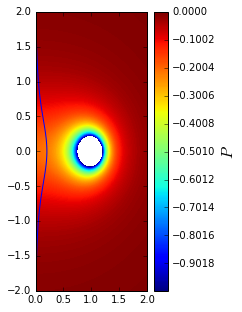

In [320]:
N = 100.0
x0,xn = -2.0,2.0
y0,yn = -2.0,2.0
x = np.linspace(x0,xn,N)
y = np.linspace(y0,yn,N)
X,Y = np.meshgrid(x,y)
z = X+1j*Y
w = -1j/(math.pi*(z-1))+1j/(math.pi*(z+1))
p = -1/2*(w.imag**2+w.real**2)
v_ana = 2/(math.pi*(y**2+1))
p_wall = -1/2*v_ana**2
fsize = 5
plt.figure(figsize = (fsize/2,fsize))
plt.xlim(0, xn)
plt.ylim(y0, yn)
contf = plt.contourf(X, Y, p, levels = np.linspace(-1.0,0.0,500))
plt.plot(-p_wall,y);
cbar = plt.colorbar(contf)
cbar.set_label('$P$', fontsize=16)

## Problem 4

In [321]:
def JT(zeta, c):
    
    z = zeta+c**2/zeta
    
    return z

$H = \frac{\epsilon}{2}\sin\delta = \frac{m}{2c}\sin\delta = 0.02$ for NACA2510, and

$T = \epsilon\frac{3\sqrt{3}}{4}\cos\delta = \frac{3\sqrt{3}m}{4c}\cos\delta = 0.1$ for NACA2510.

Let $l = 1$, solve for $m$ and $\delta$, we get $m = 0.0217$, and $\delta = 0.4792$.

In [322]:
l = 1
c = 1/4*l
m = 0.0217
delta = 0.4792
epsilon = m/c
r0 = math.sqrt(m**2+c**2-2*m*c*math.cos(delta))

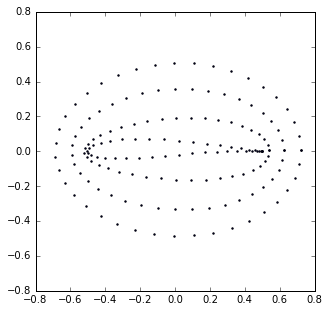

In [424]:
x0,xn = -0.8,0.8
y0,yn = -0.8,0.8
Nr = 4
Ngamma = 40
rn = 0.6
r = np.linspace(r0, rn, Nr)
gamma = np.linspace(0, 2*math.pi, Ngamma)
R, Gamma = np.meshgrid(r, gamma)
zeta = R*np.exp(1j*Gamma)+m*np.exp(1j*delta)
z = JT(zeta, c)
fsize = 5
plt.figure(figsize=(fsize, fsize))
plt.xlim(x0, xn)
plt.ylim(y0, yn)
plt.scatter(z.real, z.imag, s = 2);